**BINARY CLASSIFICATION USING VGG16**

In [2]:
 ##In this we develop a binary model using transfer laerning technique with pretrained model called vgg16

In [3]:
## importing packages

import numpy as np

In [4]:
import matplotlib.pyplot as plt


(280, 300, 3)
(256, 256, 3)


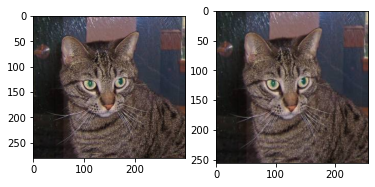

In [6]:
import cv2

image_1=cv2.imread('/content/drive/MyDrive/Dataset(c,d)/training data/cats/cat.1.jpg')

## original image

plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])

print(image_1.shape)

## resizing the image

image_resize=cv2.resize(image_1,((256,256)))

print(image_resize.shape)

plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])

In [7]:
## finding paths for train data and test data

train_data_path = '/content/drive/MyDrive/Dataset(c,d)/training data'
test_data_path='/content/drive/MyDrive/Dataset(c,d)/test_set'

In [8]:
## Making images into linear format using tensorflow ImageDataGenerator

In [9]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
preprocess_train = ImageDataGenerator(rescale = 1. / 255 , 
                                      shear_range = 0.2 , 
                                      zoom_range = 0.4,
                                      vertical_flip = True,
                                      horizontal_flip = True)


preprocess_test = ImageDataGenerator(rescale = 1./255)



In [11]:
labels = ['cats','dogs']

In [12]:
train_data = preprocess_train.flow_from_directory(train_data_path , target_size=[256,256] , class_mode = 'binary' ,classes = labels , batch_size = 32)


Found 8012 images belonging to 2 classes.


In [13]:
test_data = preprocess_test.flow_from_directory(test_data_path , target_size=[256,256] , class_mode = 'binary' ,classes = labels , batch_size = 32)

Found 2023 images belonging to 2 classes.


In [14]:
## Im not developing my own custom model so im taking the copy of vgg16 architecture

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16

In [18]:
image_size = [256,256]

In [19]:
sol = VGG16(input_shape = image_size + [3] , weights='imagenet' , include_top=False)


58889256/58889256 [==============================] - 2s 0us/step


In [20]:
# to make not to update weights of vgg16:

for i in sol.layers:
  i.trainable = False

In [21]:
from tensorflow.keras.layers import Flatten

In [22]:
# developing my own output layer:

y = Flatten()(sol.output)

In [23]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid


In [24]:
from keras.api._v2.keras import activations
final = Dense(1 ,activation = 'sigmoid')(y)

In [25]:
from tensorflow.keras.models import Model


In [26]:
vgg16_model = Model(sol.inputs , final)

In [27]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [28]:
vgg16_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['Accuracy'])


In [29]:
vgg16_model.fit(train_data , epochs = 20)

Epoch 1/20
251/251 [==============================] - 3473s 14s/step - loss: 0.4554 - Accuracy: 0.7832
Epoch 2/20
251/251 [==============================] - 157s 626ms/step - loss: 0.3236 - Accuracy: 0.8603
Epoch 3/20
251/251 [==============================] - 156s 620ms/step - loss: 0.3213 - Accuracy: 0.8597
Epoch 4/20
251/251 [==============================] - 157s 622ms/step - loss: 0.3088 - Accuracy: 0.8661
Epoch 5/20
251/251 [==============================] - 155s 618ms/step - loss: 0.2847 - Accuracy: 0.8799
Epoch 6/20
251/251 [==============================] - 156s 620ms/step - loss: 0.2715 - Accuracy: 0.8857
Epoch 7/20
251/251 [==============================] - 155s 617ms/step - loss: 0.2869 - Accuracy: 0.8777
Epoch 8/20
251/251 [==============================] - 158s 630ms/step - loss: 0.2657 - Accuracy: 0.8863
Epoch 9/20
251/251 [==============================] - 157s 624ms/step - loss: 0.2761 - Accuracy: 0.8838
Epoch 10/20
251/251 [==============================] - 159s 632ms

In [31]:
 ## checking with test data

In [32]:
test_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [33]:
y_test_pred = vgg16_model.predict(test_data)

64/64 [==============================] - 824s 13s/step


In [34]:
y_test_pred

array([[8.2501882e-01],
       [1.6291825e-09],
       [9.4442219e-03],
       ...,
       [9.9994838e-01],
       [1.0000000e+00],
       [4.9070505e-12]], dtype=float32)

In [35]:
c = []

for i in y_test_pred:
  if i > 0.5:
    c.append(1)
  else:
    c.append(0)

In [36]:
c

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,


In [37]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [38]:
accuracy_score(test_data.classes , c)

0.5022244191794365

In [39]:
confusion_matrix(test_data.classes , c)

array([[466, 545],
       [462, 550]])

In [40]:
print(classification_report(test_data.classes , c))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48      1011
           1       0.50      0.54      0.52      1012

    accuracy                           0.50      2023
   macro avg       0.50      0.50      0.50      2023
weighted avg       0.50      0.50      0.50      2023



In [41]:
## checking with own data

In [42]:
import cv2

In [44]:
def image_pred(path):
  image = cv2.imread(path)
  image = cv2.resize(image , (256,256))
  image = np.array(image) / 255.0
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  result = vgg16_model.predict(image)
  print(result)
  if result > 0.5:
    print('dog')
  else:
    print('cat')
  img = plt.imread(path)
  plt.imshow(img)


(1, 256, 256, 3)
1/1 [==============================] - 0s 20ms/step
[[8.5679e-13]]
cat


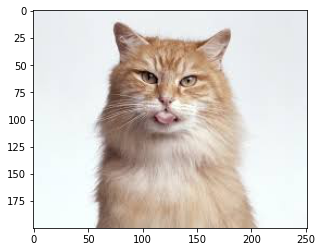

In [48]:
image_pred('/content/images (1).jpeg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 25ms/step
[[1.]]
dog


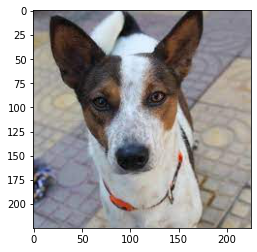

In [49]:
image_pred('/content/images.jpeg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 58ms/step
[[0.99568]]
dog


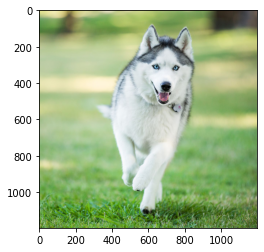

In [51]:
image_pred('/content/wolf-dog-breeds-siberian-husky-1570411330.jpg')